## Install npgamma

The following cell uncommented will install npgamma

In [1]:
# !pip install npgamma

## Imports dependencies for example

In [2]:
import dicom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request

from npgamma import calc_gamma_3d

## Load example data

In [3]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/SimonBiggs/npgamma/master/data_evaluation.dcm", 
    "data_evaluation.dcm")

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/SimonBiggs/npgamma/master/data_reference.dcm", 
    "data_reference.dcm")

ds_ref = dicom.read_file("data_reference.dcm")
ds_evl = dicom.read_file("data_evaluation.dcm")

## Import the dose from the dicom file

In [4]:
pixel_reference = np.transpose(ds_ref.pixel_array, (2, 1, 0))
pixel_evaluation = np.transpose(ds_evl.pixel_array, (2, 1, 0))

dose_reference = pixel_reference * ds_ref.DoseGridScaling
dose_evaluation = pixel_evaluation * ds_evl.DoseGridScaling

In [5]:
max_ref_dose = np.max(dose_reference)
dose_threshold = 0.03 * max_ref_dose
relevant_dose_threshold = 0.2 * max_ref_dose

## Determine x, y, and z from dicom file

In [6]:
resolution = np.array(ds_ref.PixelSpacing).astype(float)

dx = resolution[0]
x = ds_ref.ImagePositionPatient[0] + np.arange(0, ds_ref.Rows * dx, dx)

dy = resolution[1]
y = ds_ref.ImagePositionPatient[1] + np.arange(0, ds_ref.Columns * dy, dy)

In [7]:
z = np.array(ds_ref.GridFrameOffsetVector) + ds_ref.ImagePositionPatient[2]

relevant_slice = np.max(dose_evaluation, axis=(0, 1)) > relevant_dose_threshold
slice_start = np.max([np.where(relevant_slice)[0][0] - 2, 0])
slice_end = np.min([np.where(relevant_slice)[0][-1] + 2, len(z)])
z = z[relevant_slice]

dose_evaluation = dose_evaluation[:,:, relevant_slice]
dose_reference = dose_reference[:,:, relevant_slice]

## Calculate the 3d gamma index

In [8]:
x_new, y_new, z_new, gamma = calc_gamma_3d(x, y, z, dose_evaluation, dose_reference,
              distance_threshold=3, dose_threshold=dose_threshold)

## Time how long the calculation takes

In [9]:
%%timeit

x_new, y_new, z_new, gamma = calc_gamma_3d(x, y, z, dose_evaluation, dose_reference,
              distance_threshold=3, dose_threshold=3, max_test_dist=6)

10 loops, best of 3: 151 ms per loop


## Display relevant gamma

In [10]:
x_start = np.where(x_new[0] == x)[0][0]
x_end = np.where(x_new[-1] == x)[0][0]
y_start = np.where(y_new[0] == y)[0][0]
y_end = np.where(y_new[-1] == y)[0][0]
z_start = np.where(z_new[0] == z)[0][0]
z_end = np.where(z_new[-1] == z)[0][0]

relevant_gamma_ref = dose_evaluation[
    y_start:y_end + 1, x_start:x_end + 1, z_start:z_end + 1] > relevant_dose_threshold
relevant_gamma = gamma[relevant_gamma_ref]
relevant_less_than_1 = np.sum(relevant_gamma < 1) / len(relevant_gamma)

print("{0:.2f}% of relevant points have gamma < 1".format(100 * relevant_less_than_1))

90.88% of relevant points have gamma < 1


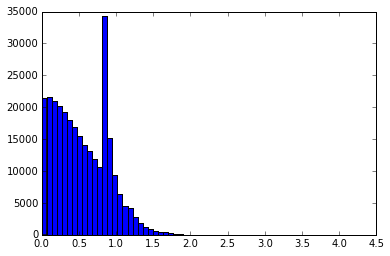

In [11]:
plt.hist(relevant_gamma, 60);

## Draw colour washes representing the relevant slices

Slice = -62.5
62.64% of relevant points have gamma < 1


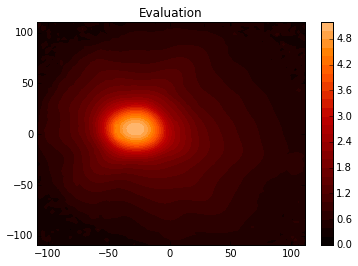

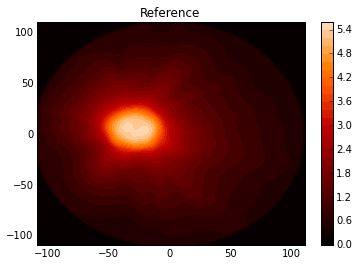

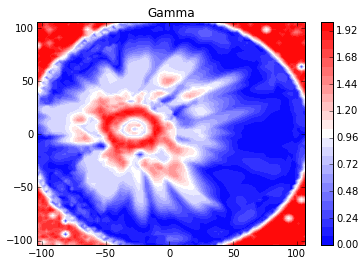



Slice = -60.0
64.55% of relevant points have gamma < 1


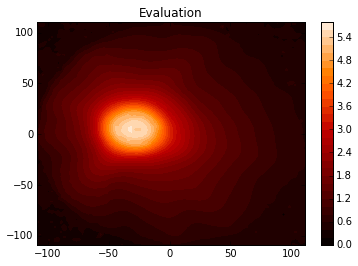

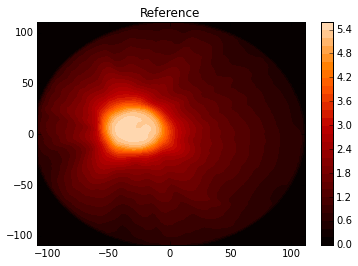

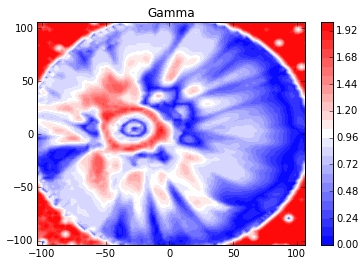



Slice = -57.5
74.69% of relevant points have gamma < 1


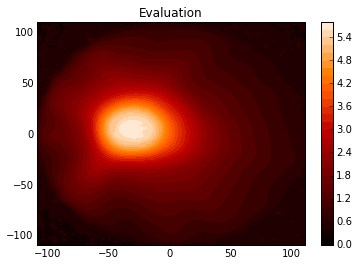

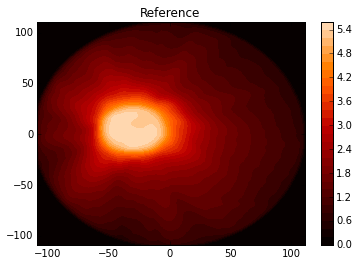

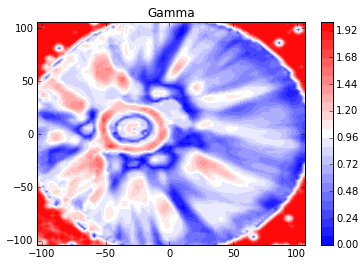



Slice = -55.0
83.65% of relevant points have gamma < 1


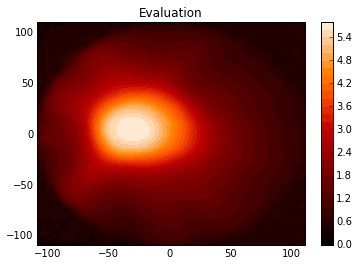

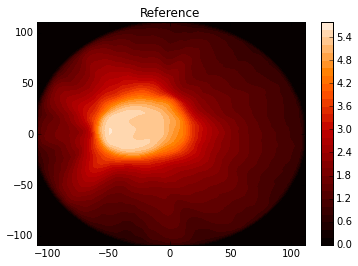

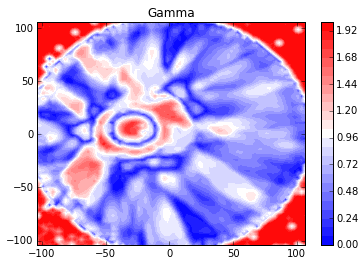



Slice = -52.5
84.98% of relevant points have gamma < 1


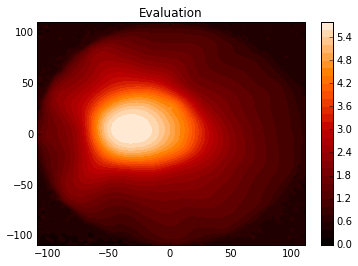

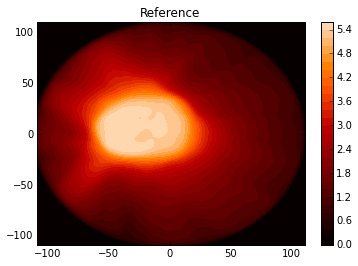

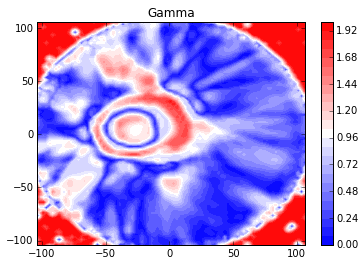



Slice = -50.0
88.74% of relevant points have gamma < 1


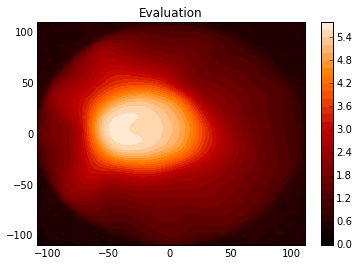

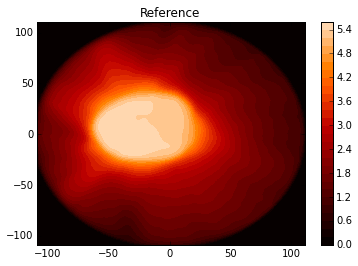

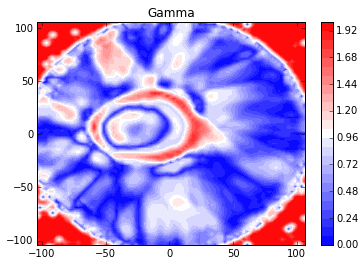



Slice = -47.5
90.38% of relevant points have gamma < 1


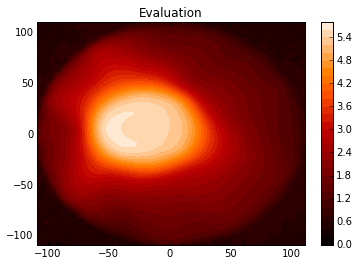

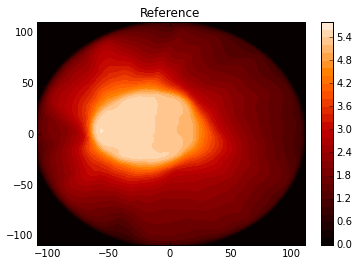

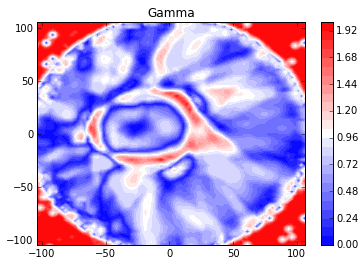



Slice = -45.0
91.37% of relevant points have gamma < 1


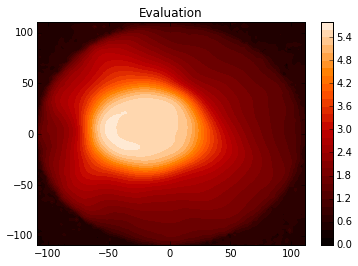

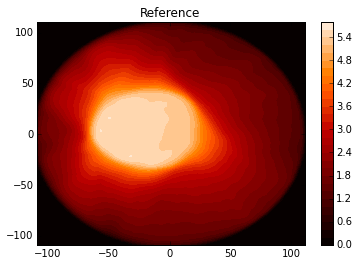

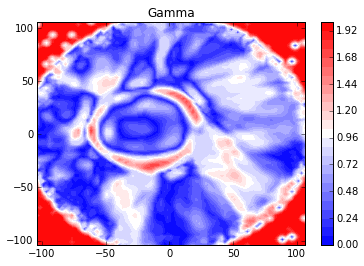



Slice = -42.5
93.84% of relevant points have gamma < 1


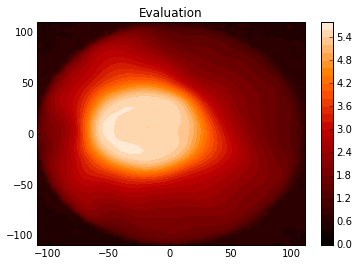

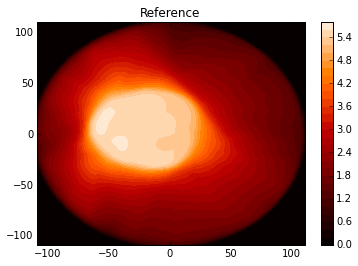

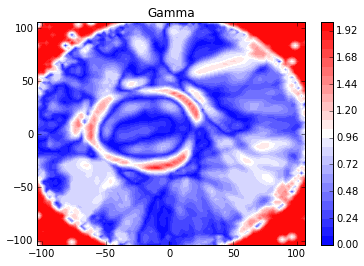



Slice = -40.0
92.81% of relevant points have gamma < 1


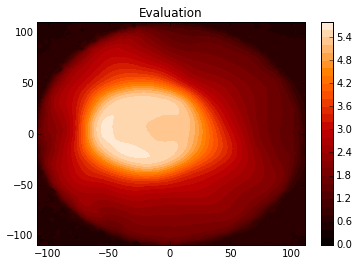

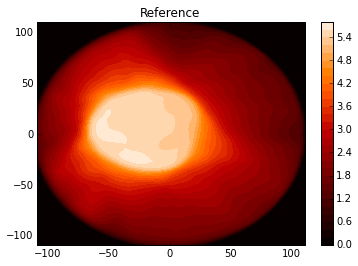

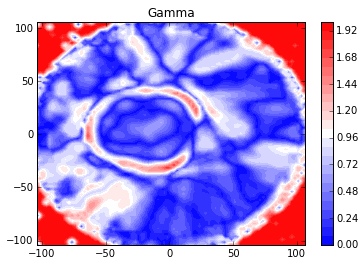



Slice = -37.5
93.30% of relevant points have gamma < 1


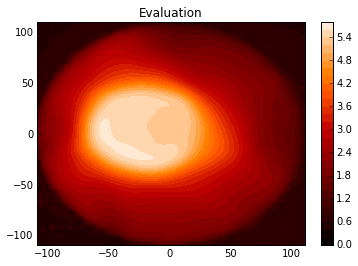

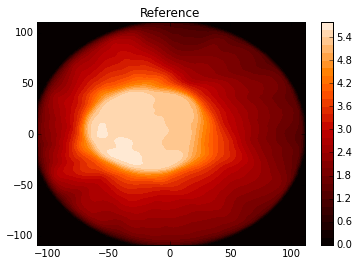

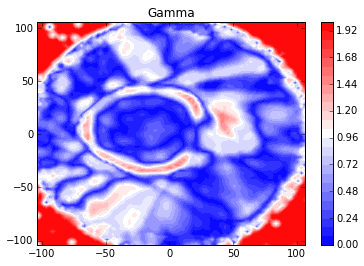



Slice = -35.0
94.96% of relevant points have gamma < 1


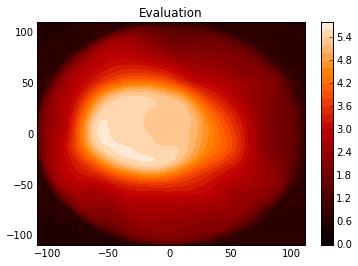

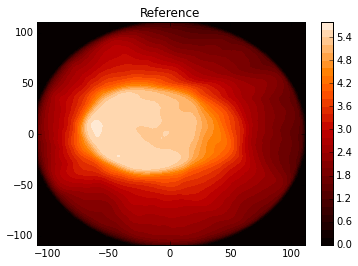

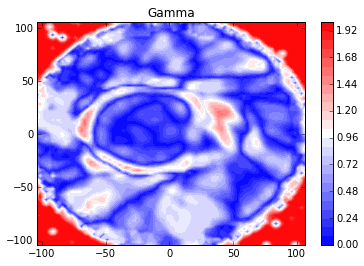



Slice = -32.5
89.30% of relevant points have gamma < 1


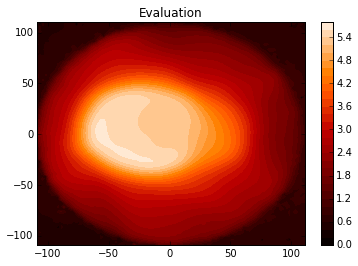

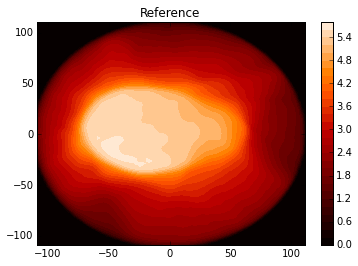

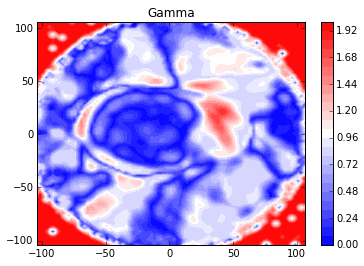



Slice = -30.0
87.18% of relevant points have gamma < 1


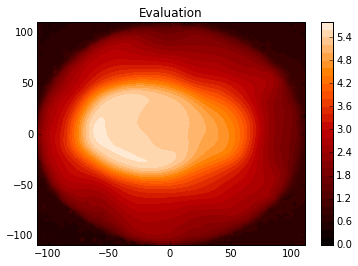

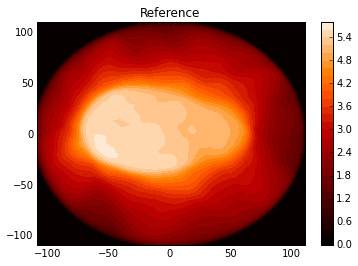

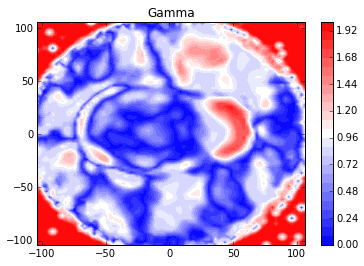



Slice = -27.5
91.07% of relevant points have gamma < 1


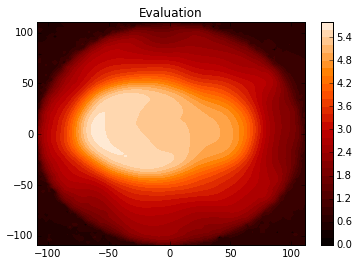

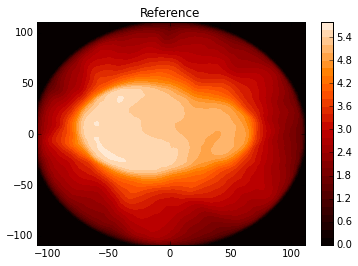

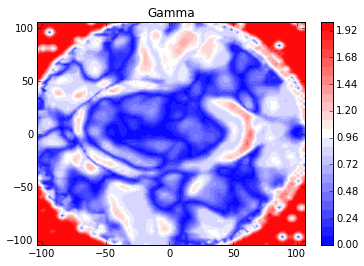



Slice = -25.0
90.62% of relevant points have gamma < 1


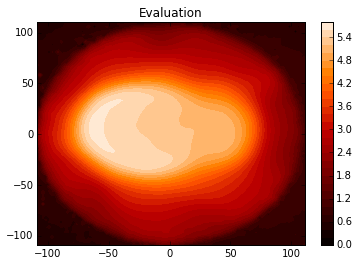

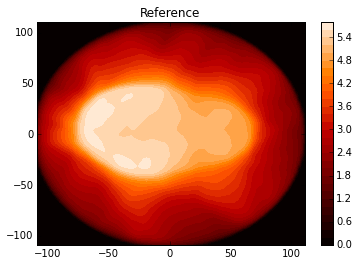

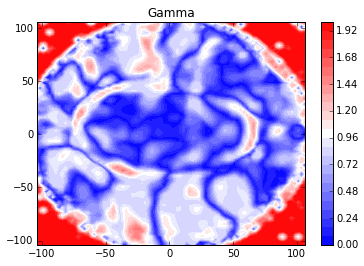



Slice = -22.5
92.70% of relevant points have gamma < 1


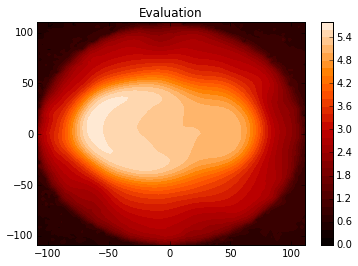

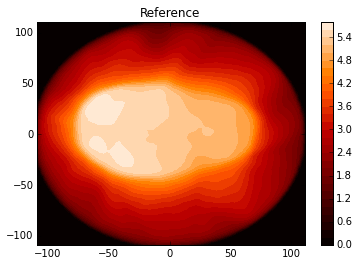

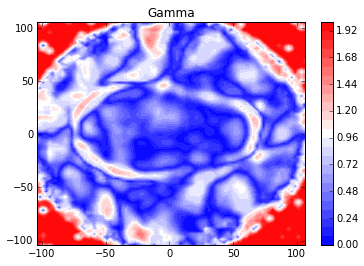



Slice = -20.0
94.70% of relevant points have gamma < 1


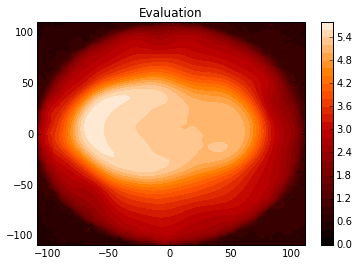

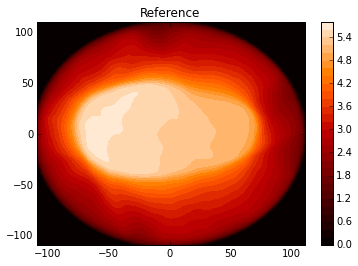

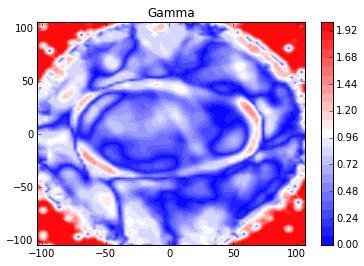



Slice = -17.5
94.70% of relevant points have gamma < 1


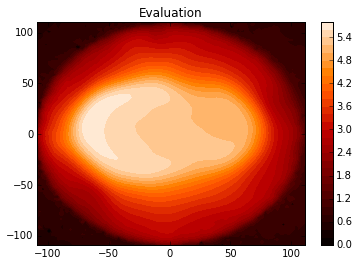

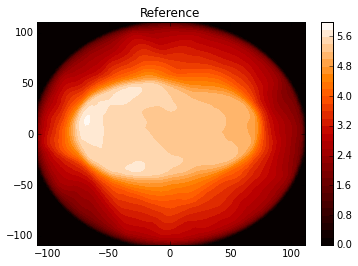

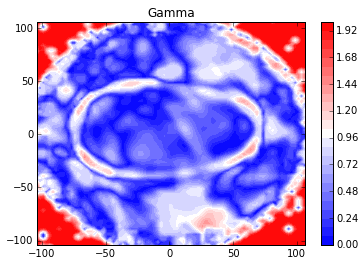



Slice = -15.0
89.70% of relevant points have gamma < 1


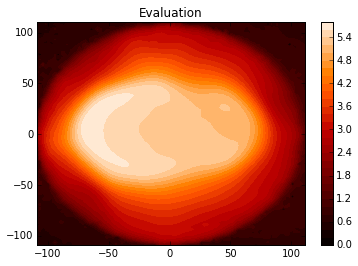

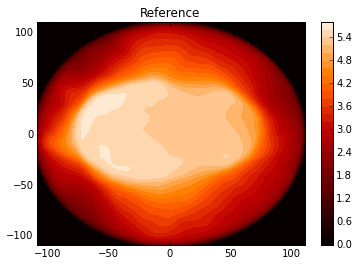

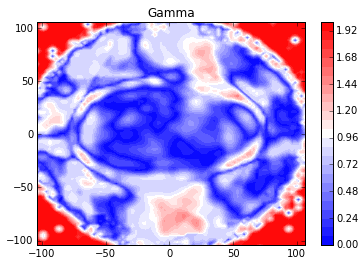



Slice = -12.5
88.33% of relevant points have gamma < 1


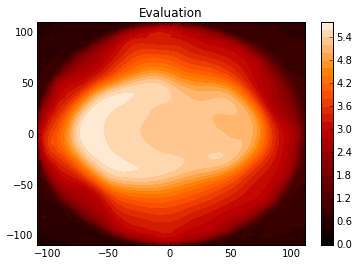

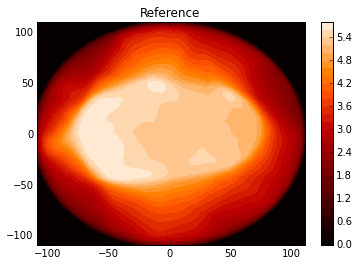

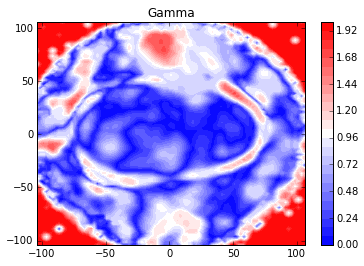



Slice = -10.0
88.01% of relevant points have gamma < 1


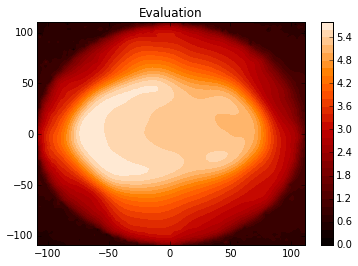

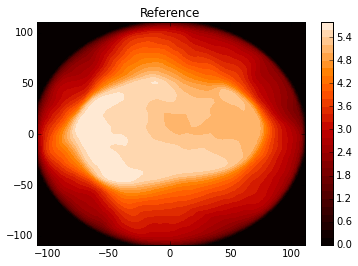

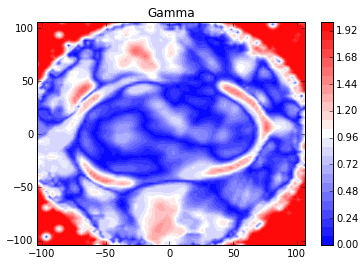



Slice = -7.5
93.10% of relevant points have gamma < 1


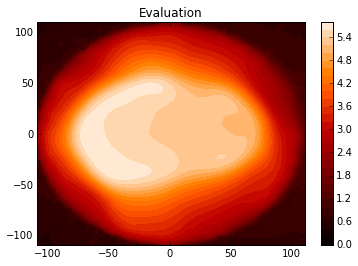

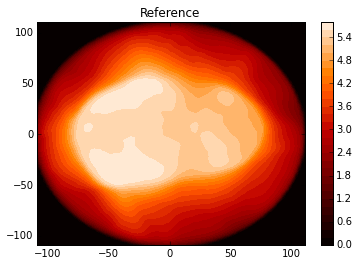

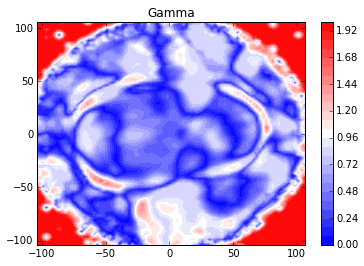



Slice = -5.0
94.96% of relevant points have gamma < 1


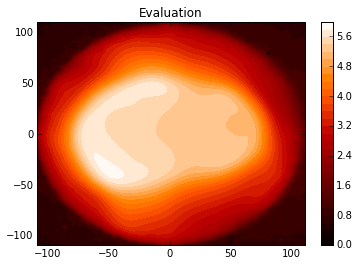

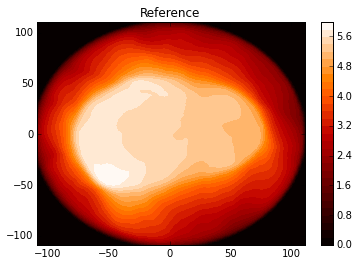

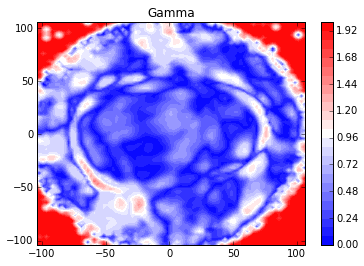



Slice = -2.5
89.98% of relevant points have gamma < 1


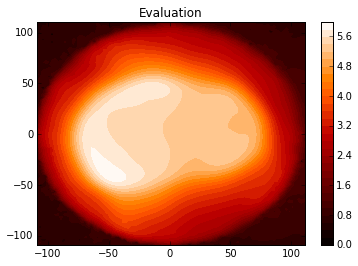

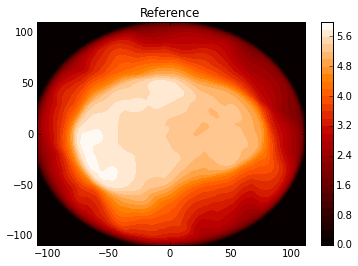

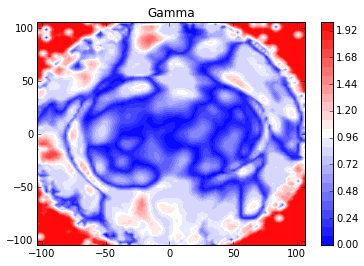



Slice = 0.0
88.46% of relevant points have gamma < 1


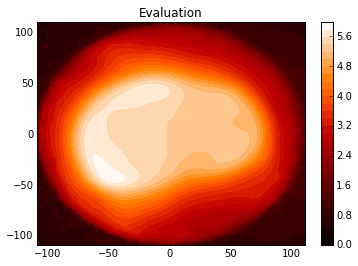

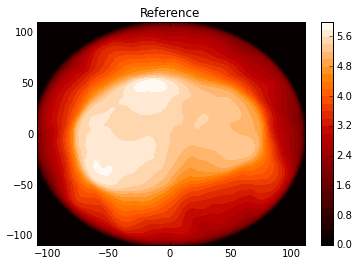

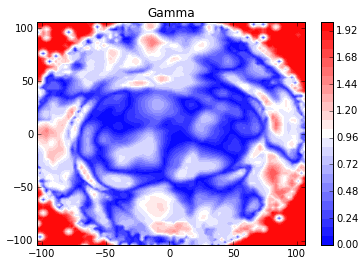



Slice = 2.5
92.84% of relevant points have gamma < 1


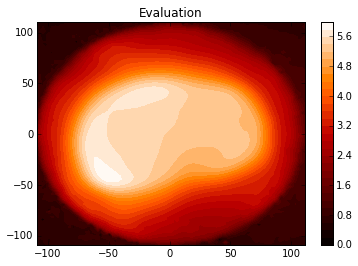

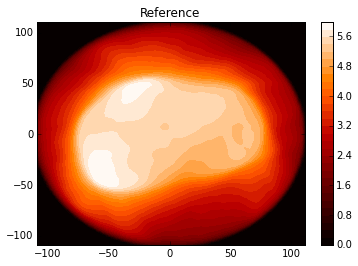

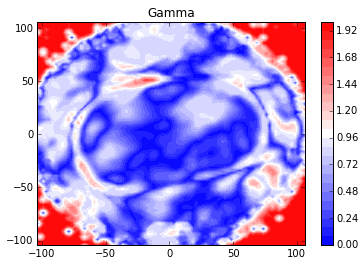



Slice = 5.0
92.41% of relevant points have gamma < 1


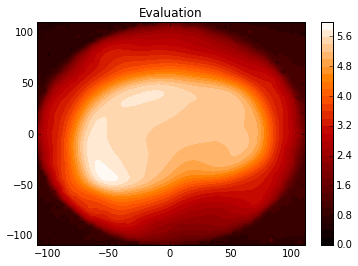

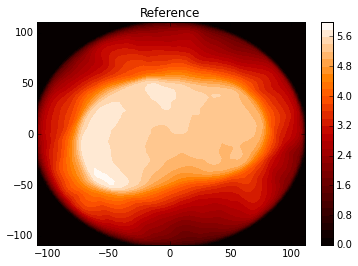

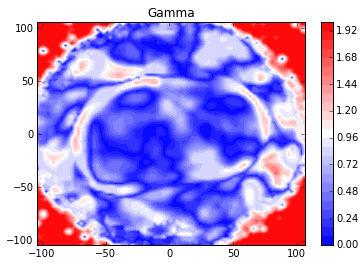



Slice = 7.5
89.39% of relevant points have gamma < 1


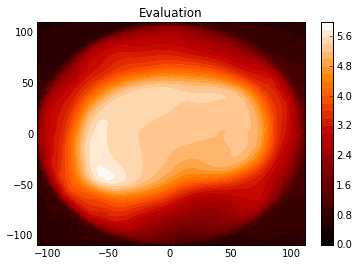

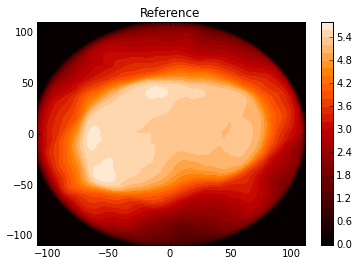

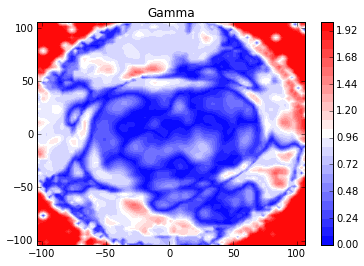



Slice = 10.0
92.80% of relevant points have gamma < 1


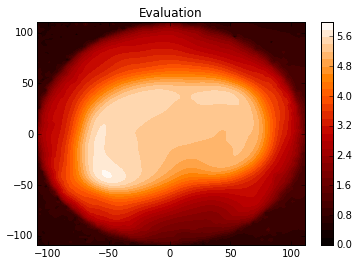

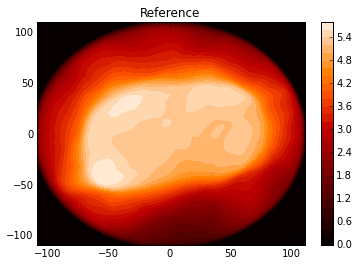

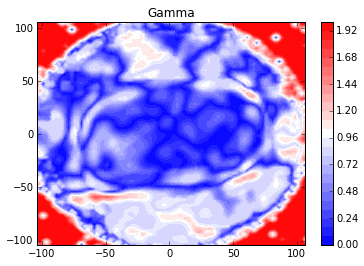



Slice = 12.5
90.84% of relevant points have gamma < 1


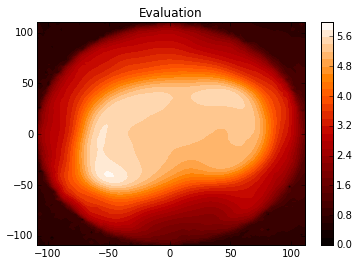

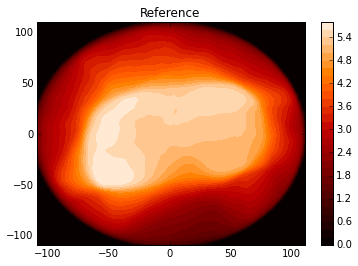

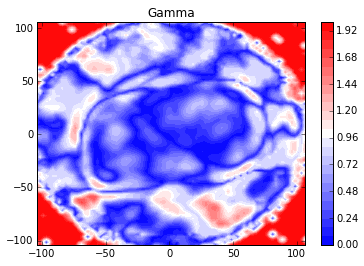



Slice = 15.0
89.69% of relevant points have gamma < 1


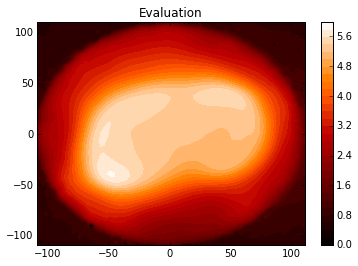

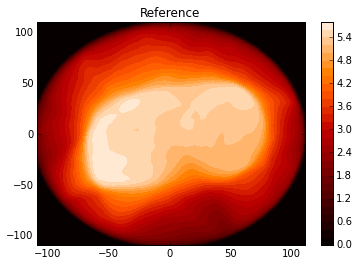

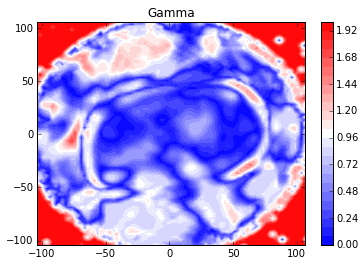



Slice = 17.5
88.07% of relevant points have gamma < 1


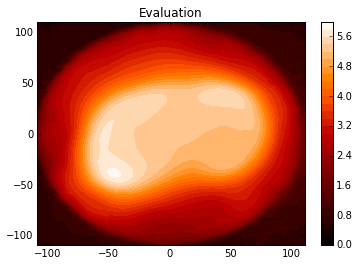

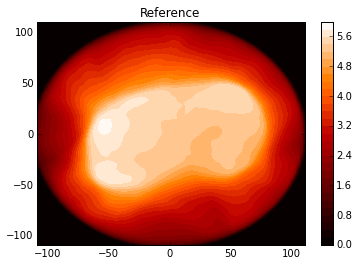

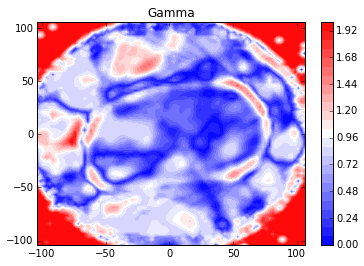



Slice = 20.0
89.14% of relevant points have gamma < 1


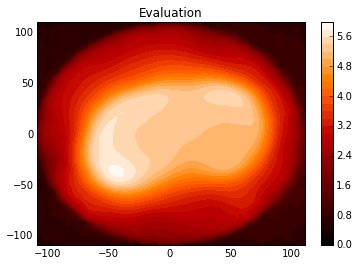

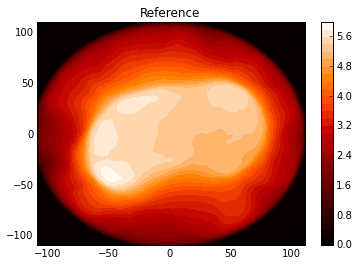

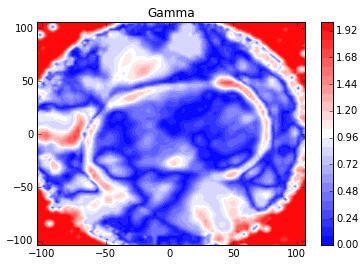



Slice = 22.5
93.82% of relevant points have gamma < 1


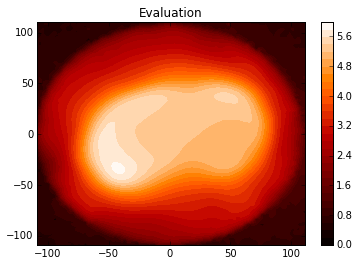

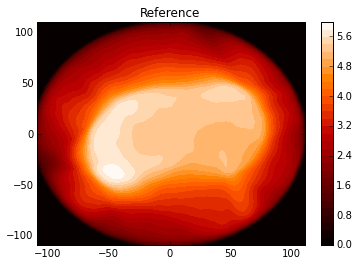

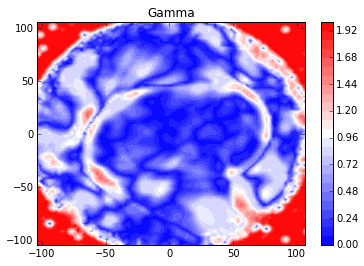



Slice = 25.0
95.22% of relevant points have gamma < 1


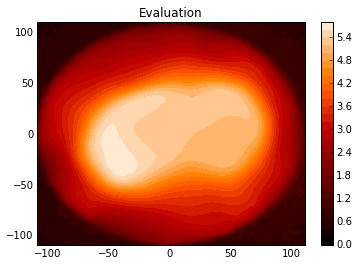

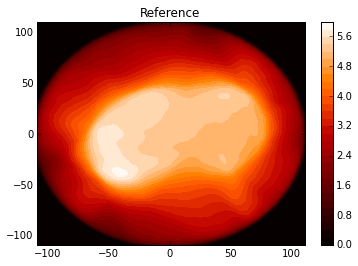

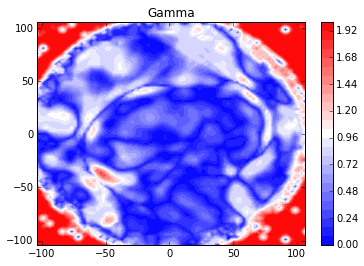



Slice = 27.5
94.17% of relevant points have gamma < 1


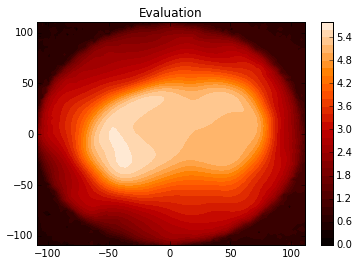

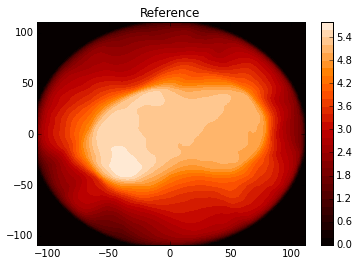

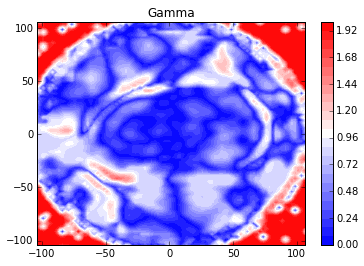



Slice = 30.0
92.59% of relevant points have gamma < 1


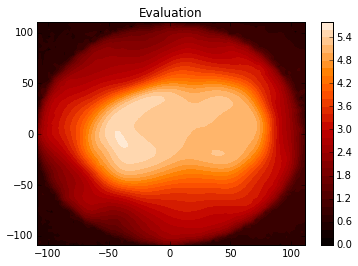

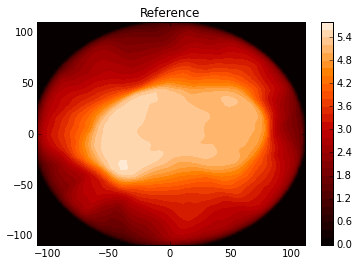

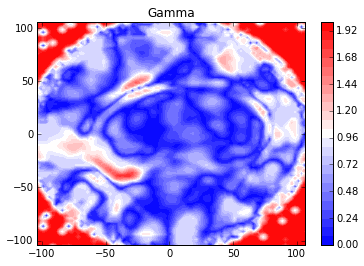



Slice = 32.5
94.61% of relevant points have gamma < 1


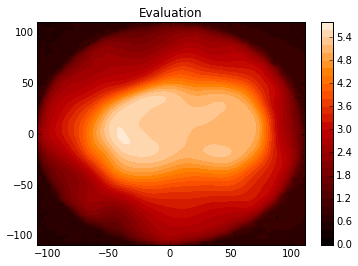

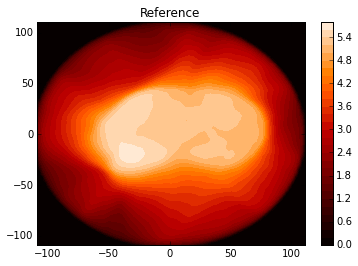

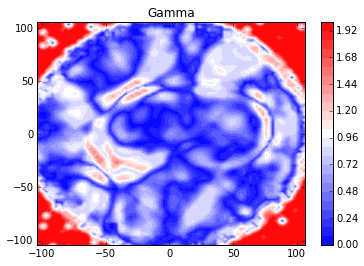



Slice = 35.0
93.11% of relevant points have gamma < 1


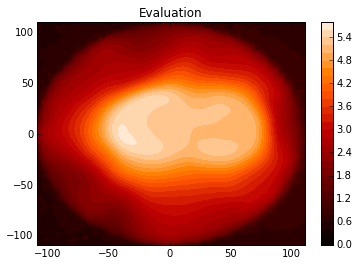

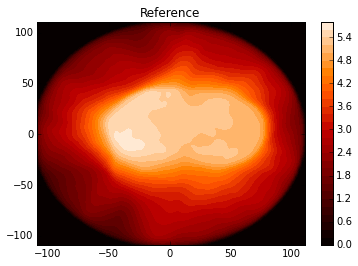

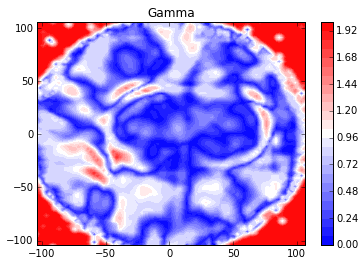



Slice = 37.5
92.18% of relevant points have gamma < 1


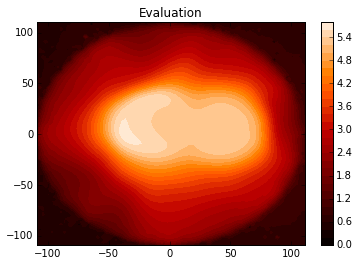

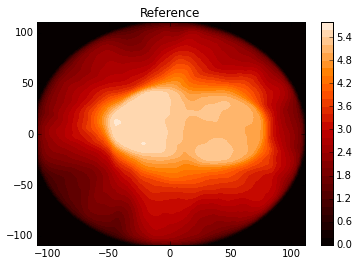

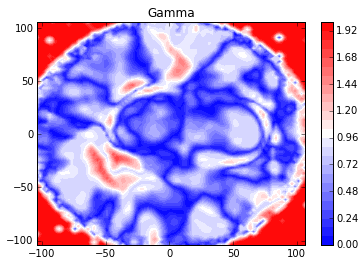



Slice = 40.0
93.50% of relevant points have gamma < 1


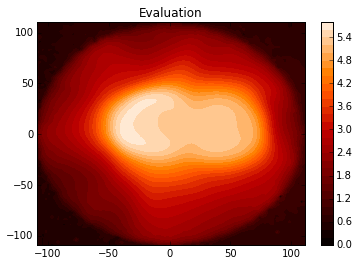

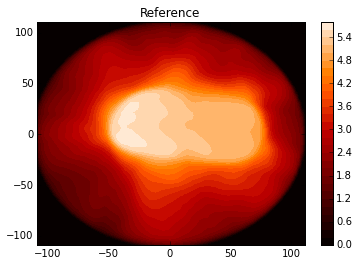

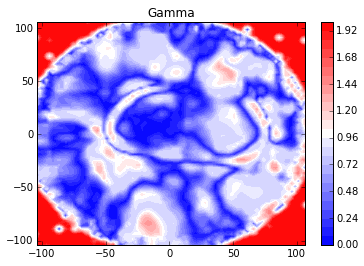



Slice = 42.5
90.25% of relevant points have gamma < 1


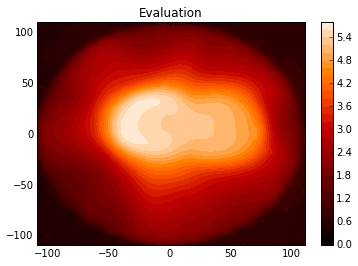

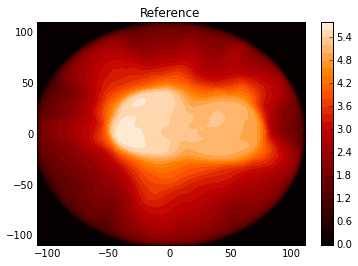

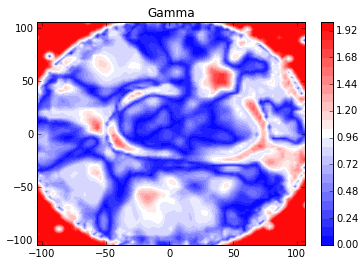



Slice = 45.0
90.93% of relevant points have gamma < 1


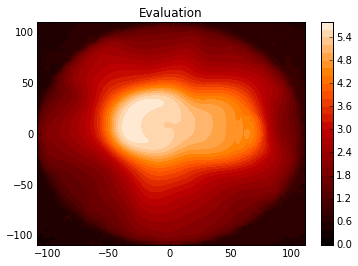

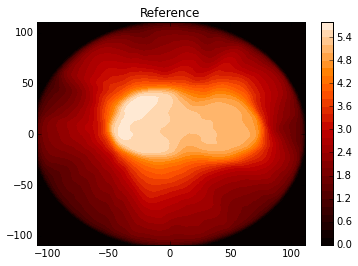

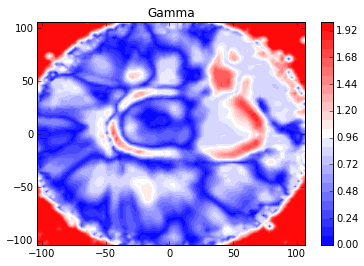



Slice = 47.5
91.05% of relevant points have gamma < 1


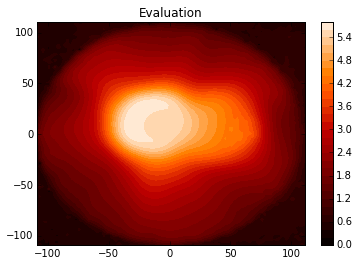

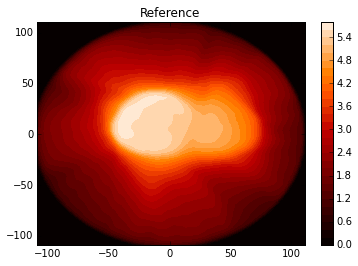

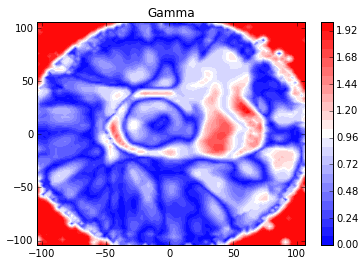



Slice = 50.0
94.08% of relevant points have gamma < 1


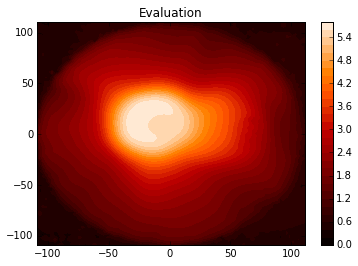

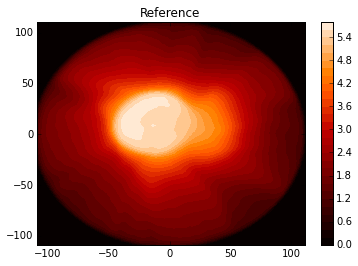

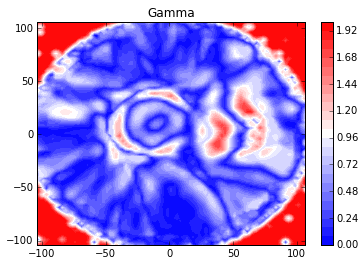



Slice = 52.5
94.01% of relevant points have gamma < 1


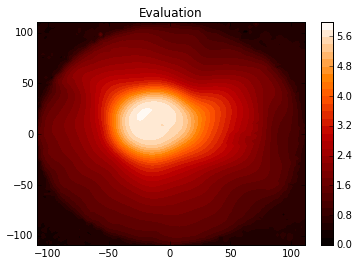

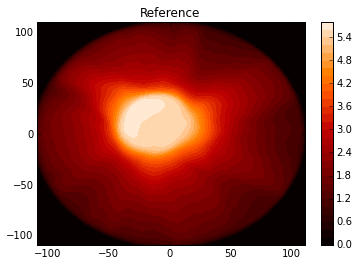

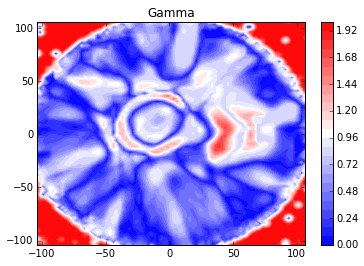



Slice = 55.0
92.61% of relevant points have gamma < 1


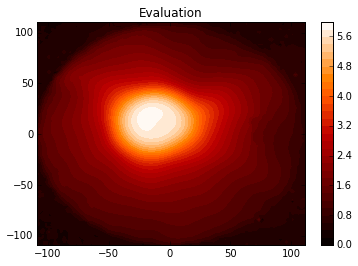

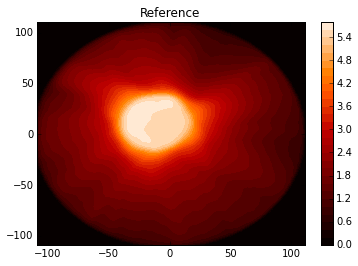

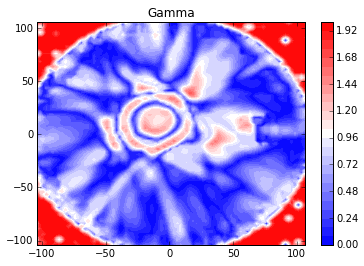



Slice = 57.5
93.36% of relevant points have gamma < 1


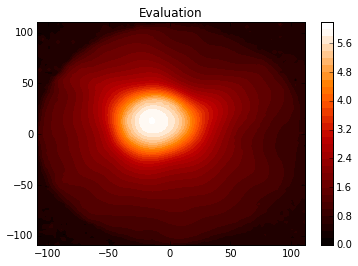

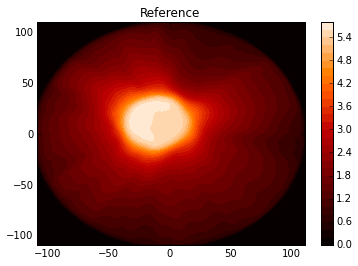

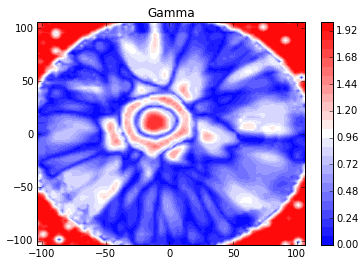



Slice = 60.0
93.14% of relevant points have gamma < 1


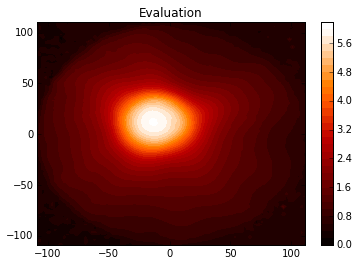

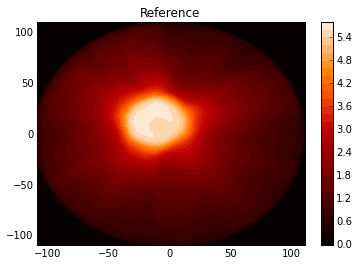

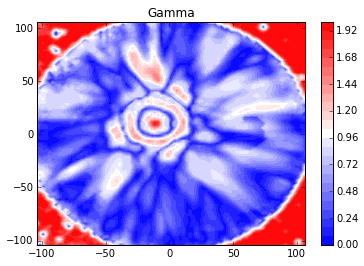



Slice = 62.5
95.85% of relevant points have gamma < 1


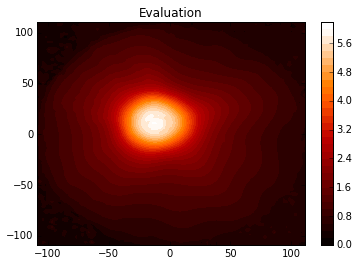

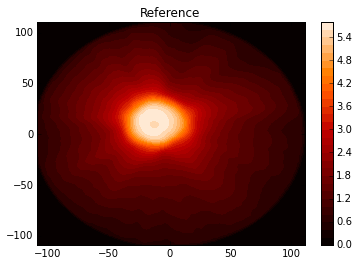

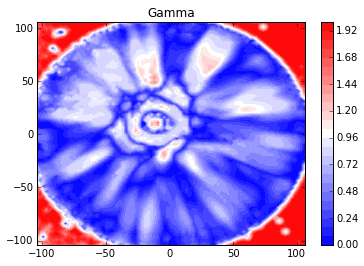



Slice = 65.0
94.99% of relevant points have gamma < 1


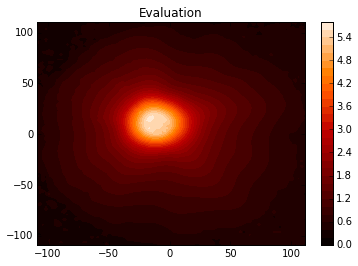

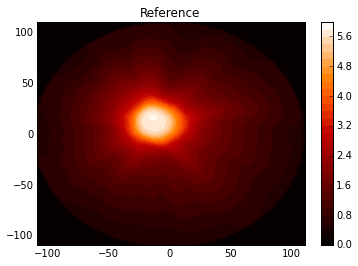

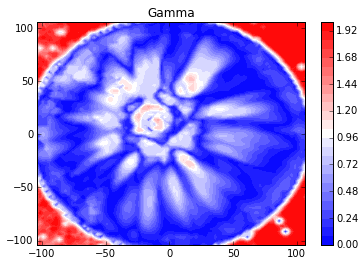



Slice = 67.5
93.95% of relevant points have gamma < 1


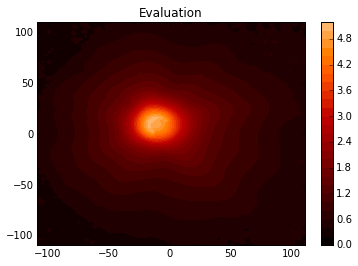

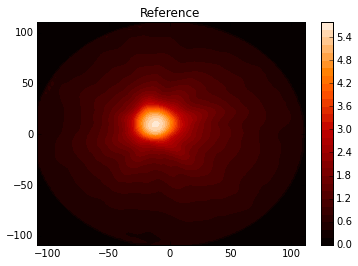

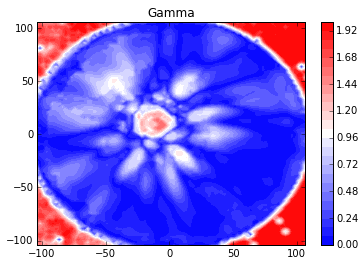

In [12]:
draw_gamma = gamma.copy()
draw_gamma[draw_gamma > 2] = 2

for i, z_i in enumerate(z_new):
    j = np.where(z_i == z)[0][0]
    print("======================================================================")
    print("Slice = {0}".format(z_i))
    
    relevant_gamma_ref = dose_evaluation[y_start:y_end, x_start:x_end, j] > relevant_dose_threshold
    relevant_gamma = gamma[relevant_gamma_ref, i]
    relevant_less_than_1 = np.sum(relevant_gamma < 1) / len(relevant_gamma)
    
    print("{0:.2f}% of relevant points have gamma < 1".format(100 * relevant_less_than_1))
    
   
    plt.contourf(
        x, y, dose_evaluation[:, :, j], 30, 
        vmin=0, vmax=max_ref_dose, cmap=plt.get_cmap('gist_heat'))
    plt.title("Evaluation")
    plt.colorbar()
    plt.show()
    
    plt.contourf(
        x, y, dose_reference[:, :, j], 30, 
        vmin=0, vmax=max_ref_dose, cmap=plt.get_cmap('gist_heat'))
    plt.title("Reference")  
    plt.colorbar()
    plt.show()
    
    plt.contourf(
        x_new, y_new, draw_gamma[:, :, i], 30, 
        vmin=0, vmax=2, cmap=plt.get_cmap('bwr'))
    plt.title("Gamma")    
    plt.colorbar()  
    plt.show()
    
    print("\n")